<a href="https://colab.research.google.com/github/alexloaeza12/Simulaci-n-I/blob/main/Transoformada_inversa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Método de la transformada inversa

El ejemplo incluiye:

- Gráfica de la función de densidad de probabilidad (fdp).
- Gráfica de la función acumulativa.
- Histograma de la muestra generada.
- Notas y aclaraciones documentadas.


---



---



Importamos la librarías necesarias

In [22]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
from scipy.integrate import quad

Verificación de que la fdp es una función válida
- Verificamos que la integral de 0 a 1, sea 1.


In [23]:
# Definimos la función de densidad de probabilidad (fdp)
def fdp(x):
    return 20 * x * (1 - x) ** 3

# Verificamos que la integral de la fdp de 0 a 1 sea 1
integral, _ = quad(fdp, 0, 1)
print(f'Integral de la fdp de 0 a 1: {integral}')  # Debe ser 1

Integral de la fdp de 0 a 1: 1.0


Procedemos con el método
- Gráficamos de la función de densidad de probabilidad (fdp).

[0.26928417121241444, 0.057090672821137556, 0.36854371492059346, 0.13321039153040193, 0.14935504699625923, 0.33830751871718423, 0.1132056192622567, 0.12204393483467013, 0.17112085712903113, 0.4433182845160446, 0.34975807266064807, 0.10370958644472494, 0.35595256052903124, 0.32190239229901096, 0.3087778367550261, 0.3448958256468757, 0.3150882939405222, 0.09530674868254663, 0.20078155676537857, 0.16568618441553706, 0.4557941590239638, 0.0134637535306249, 0.2571067359154531, 0.16024485267807786, 0.16113636524264507, 0.0758621799957605, 0.05756881051435292, 0.00915123829784159, 0.5600057710201798, 0.09858059763257643, 0.4284323924883999, 0.03334648116848393, 0.0887821908198747, 0.2840299440165661, 0.07070712882740338, 0.21755444824570802, 0.09496625513663715, 0.22699736243167512, 0.009331132011783927, 0.5810270260761099, 0.3375044332845999, 0.17927032184850733, 0.1216351074382962, 0.15993843865060398, 0.266655208350147, 0.2649657359064377, 0.6416473216382312, 0.032432603564816365, 0.025952

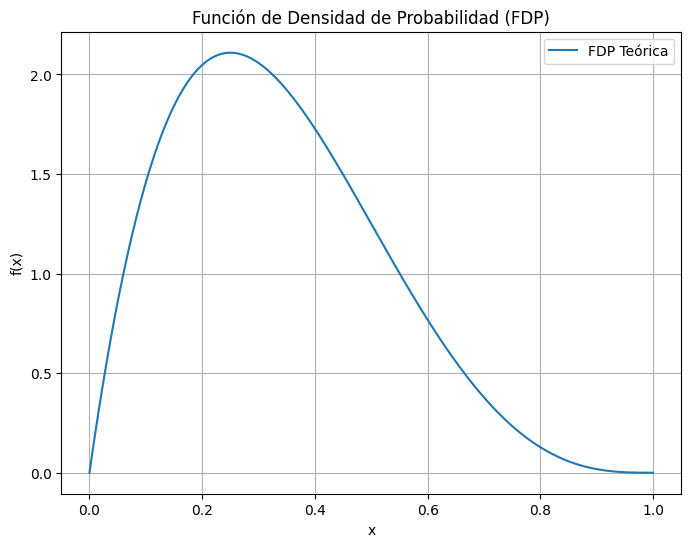

In [29]:
# Generacimos las muestras usando el método de la transformada inversa
lista = []
for _ in range(10000):
    u = random.random()  # Generamos un valor uniforme en [0, 1)
    x = 1 - (1 - u) ** (1/3)  # Transformada inversa de la CDF de la función dada
    lista.append(x)

print(lista)

x_vals = np.linspace(0, 1, 400)
fdp = fdp(x_vals)

# Graficamos la fdp teórica
plt.figure(figsize=(8, 6))
plt.plot(x_vals, fdp, label='FDP Teórica')
plt.title('Función de Densidad de Probabilidad (FDP)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

Graficamos el histograma de la muestra generada

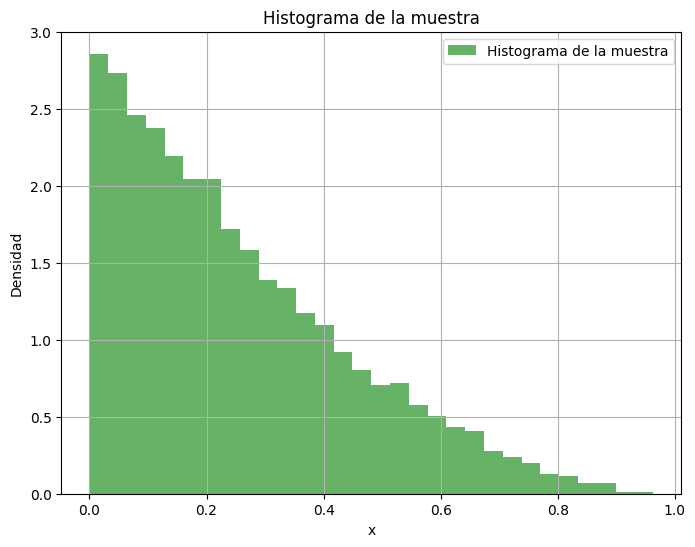

In [33]:
plt.figure(figsize=(8, 6))
plt.hist(lista, bins=30, density=True, alpha=0.6, color='g', label='Histograma de la muestra')
plt.title('Histograma de la muestra')
plt.xlabel('x')
plt.ylabel('Densidad')
plt.legend()
plt.grid(True)
plt.show()

Graficamos el histograma de la muestra generada

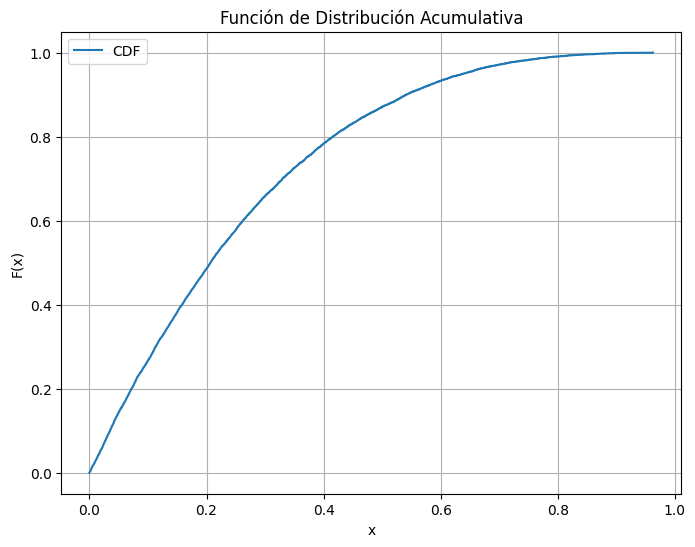

In [32]:
# Función de distribución acumulativa
def cdf(muestra):
    n = len(muestra)
    x = np.sort(muestra)
    y = np.arange(1, n + 1) / n
    return x, y

X, Y = cdf(lista)

# Graficamos la función acumulativa
plt.figure(figsize=(8, 6))
plt.step(X, Y, where='post', label='CDF')
plt.title('Función de Distribución Acumulativa')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()